In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [63]:
df = pd.read_csv('credit.csv')

In [64]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [65]:
df.shape

(10000, 4)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [67]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df.corr()

,balance,income
balance,1.000000,-0.152243
income,-0.152243,1.000000


In [70]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

# How many defaulter in the data?

<AxesSubplot:ylabel='default'>

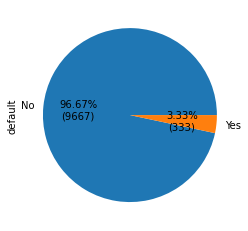

In [71]:
df['default'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['default'].value_counts().sum())))

# How many students in this data?

<AxesSubplot:ylabel='student'>

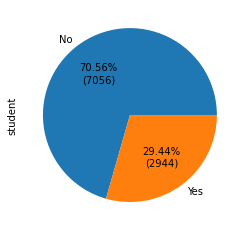

In [72]:
df['student'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['student'].value_counts().sum())))

# How balance column looks like?

<AxesSubplot:xlabel='balance', ylabel='Density'>

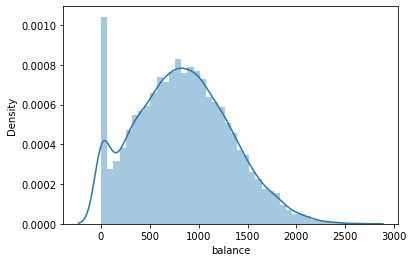

In [73]:
sns.distplot(df['balance'])

We can say this is right skewed data.
majority of the people have balance between 500-1000

# How income column looks like?

<AxesSubplot:xlabel='income', ylabel='Density'>

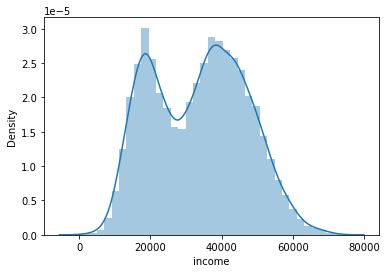

In [74]:
sns.distplot(df['income'])

In [75]:
df.sort_values(by='student')

,default,student,balance,income
0,No,No,729.526495,44361.625074
6069,No,No,509.156011,47444.151455
6068,No,No,870.302726,24263.127436
6066,No,No,409.160368,45055.897473
6065,No,No,563.286411,51720.911527
...,...,...,...,...
7565,No,Yes,1170.224624,8747.472720
1709,Yes,Yes,2009.685744,25694.496158
7568,No,Yes,1294.285702,17444.603565
7532,No,Yes,950.776787,17711.741757


In [76]:
def Value_Countplot(data,hue=None,x_pos=0.25,rotation=None):
    '''
    data: data
    hue: hue data
    x_pos: int/float - to position the value
    
    '''
    ax = sns.countplot(data,hue=hue)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)
        x = i.get_x() # get x_axis value
        ax.text(x=x+x_pos,y=height-(height/10),s=height,fontsize=10,fontweight='bold',rotation=rotation)

# Students vs Defaulter on Bar Plot

Text(0.5, 1.0, 'Bar Plot: Students vs Defaulter')

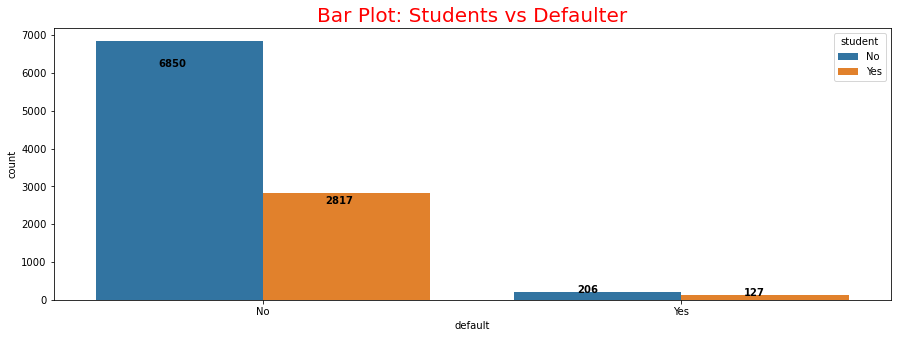

In [99]:
plt.figure(figsize=(15,5))
# plt.subplot(311)
Value_Countplot(df['default'],hue=df['student'],x_pos=0.15)
plt.title('Bar Plot: Students vs Defaulter',fontdict={'fontsize':20,'color':'red'})


Text(0.5, 1.0, 'Scatter Plot: Income vs Balance vs Student vs Default')

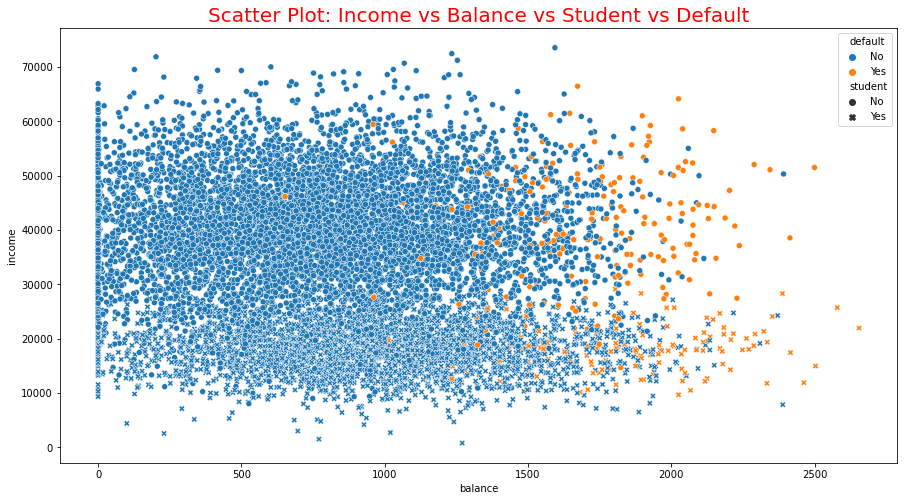

In [98]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['balance'],df['income'],hue=df['default'],style=df['student'])
plt.title('Scatter Plot: Income vs Balance vs Student vs Default',fontdict={'fontsize':20,'color':'red'})


Text(0.5, 1.0, 'Cluster Map: Students vs Defaulter')

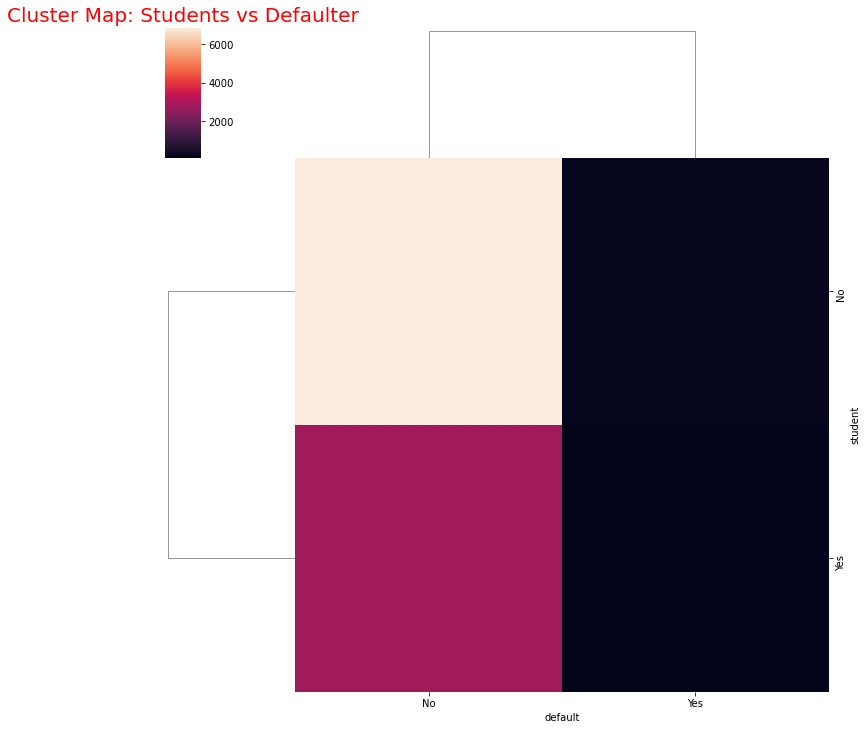

In [97]:
sns.clustermap(pd.crosstab(df['student'],df['default']))
plt.title('Cluster Map: Students vs Defaulter',fontdict={'fontsize':20,'color':'red'})


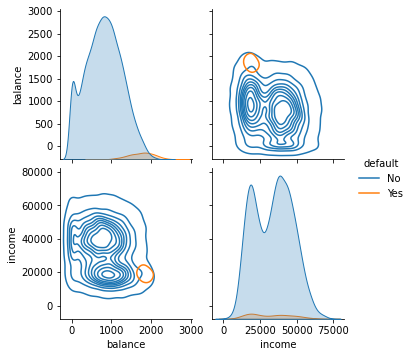

In [101]:
sns.pairplot(df,hue='default',kind='kde')
# plt.title('Pair Plot: Income vs Balance vs Default',fontdict={'fontsize':20,'color':'red'})

Text(0.5, 1.0, 'Box Plot: Balance vs Default')

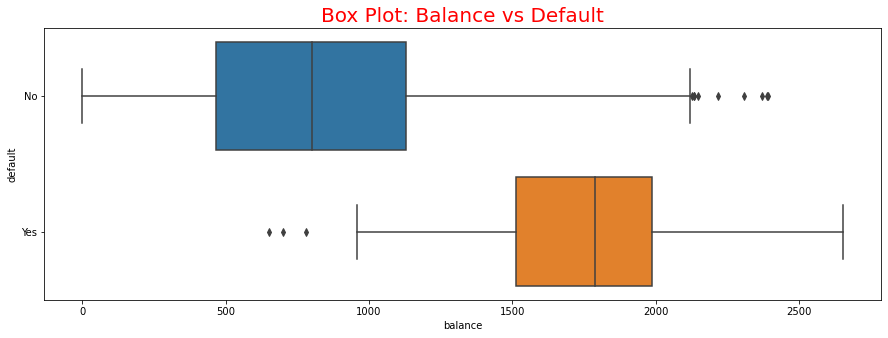

In [102]:
plt.figure(figsize=(15,5))
sns.boxplot(df['balance'],df['default'])
plt.title('Box Plot: Balance vs Default',fontdict={'fontsize':20,'color':'red'})


Text(0.5, 1.0, 'Box Plot: Balance vs Student')

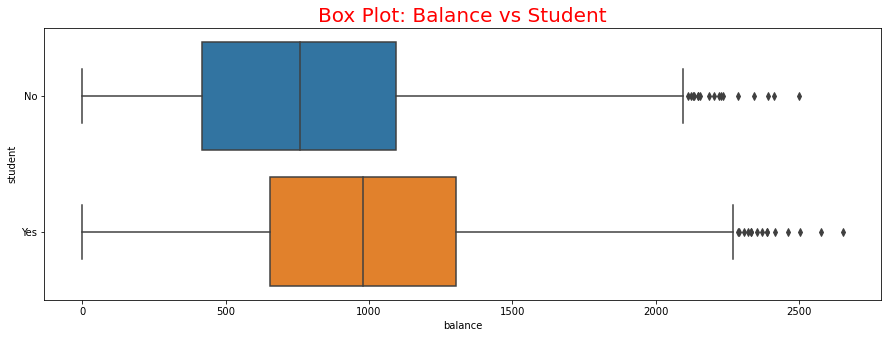

In [103]:
plt.figure(figsize=(15,5))
sns.boxplot(df['balance'],df['student'])
plt.title('Box Plot: Balance vs Student',fontdict={'fontsize':20,'color':'red'})

Text(0.5, 1.0, 'Box Plot: Income vs Student')

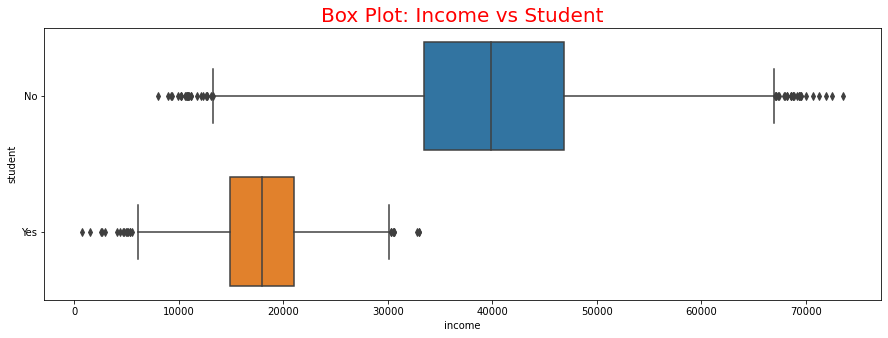

In [104]:
plt.figure(figsize=(15,5))
sns.boxplot(df['income'],df['student'])
plt.title('Box Plot: Income vs Student',fontdict={'fontsize':20,'color':'red'})

Text(0.5, 1.0, 'Box Plot: Income vs Default')

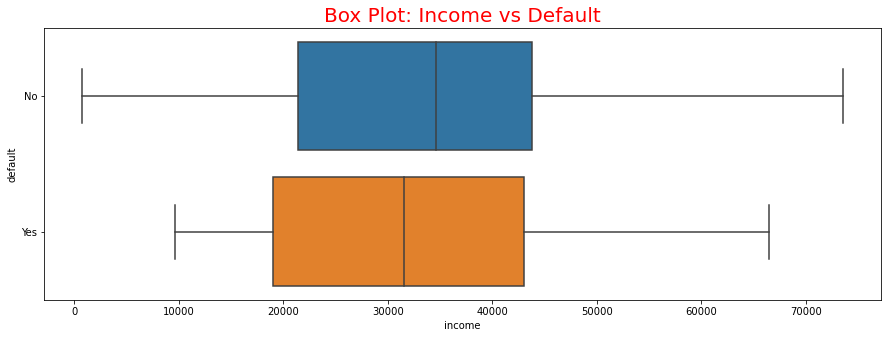

In [105]:
plt.figure(figsize=(15,5))
sns.boxplot(df['income'],df['default'])
plt.title('Box Plot: Income vs Default',fontdict={'fontsize':20,'color':'red'})